# FC Barcelona xG Rolling Plot
## La Liga Seasons 2021-2022 & 2022-2023

In this project, we will use Python, Pandas, and Matplotlib to create a rolling plot of FC Barcelona's expected goals (xG) for the seasons 2021-2022 and 2022-2023. The xG metric is used to evaluate the quality of scoring opportunities in a football match, and can provide insights into the team's attacking performance.

The data for this project will be obtained from understat.com and will include FC Barcelona's xG data for all games played in the selected seasons. We will process the data using Pandas, a powerful data analysis library, to calculate rolling averages of xG for various time periods, such as the last 5 or 10 games.

Using Matplotlib, a data visualization library, we will create a line plot of the rolling xG averages. We will customize the plot by adding titles, labels, and legends, as well as highlighting specific data points of interest. For example, we will add a vertical line to the plot to separate the xG numbers of Xavi, the current coach of FC Barcelona, from those of Koeman, the former coach.

The final plot will provide an insightful visual representation of FC Barcelona's attacking performance over the selected seasons, and can be used to identify trends and patterns in the team's performance. This information can be valuable for coaches, analysts, and fans alike, as it can help inform game strategy and improve overall performance.

In [2]:
!pip install highlight_text

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text

## Data Cleaning

In [5]:
df = pd.read_csv("xG_Barcelona_data.csv")

In [10]:
home_df = df.copy()

# The melt() function unpivots a DataFrame from a wide format to a long format by "melting" one or more columns into rows, while keeping other columns as identifier variables. #
# the columns "date", "home_team_name", and "away_team_name" are specified as identifier variables, and all other columns are "melted" into rows.
home_df = home_df.melt(id_vars = ["date", "home_team_name", "away_team_name"])
home_df["venue"] = "H"
home_df.rename(columns = {"home_team_name":"team", "away_team_name":"opponent"}, inplace = True) # changing the column names
home_df.replace({"variable":{"home_team_xG":"xG_for", "away_team_xG":"xG_ag"}}, inplace = True) #changing some of the melted columns
home_df

,date,team,opponent,variable,value,venue
0,2021-08-15 00:00:00,Barcelona,Real Sociedad,Unnamed: 0,0.00,H
1,2021-08-21 00:00:00,Athletic Club,Barcelona,Unnamed: 0,1.00,H
2,2021-08-29 00:00:00,Barcelona,Getafe,Unnamed: 0,2.00,H
3,2021-09-20 00:00:00,Barcelona,Granada,Unnamed: 0,3.00,H
4,2021-09-23 00:00:00,Cadiz,Barcelona,Unnamed: 0,4.00,H
...,...,...,...,...,...,...
175,2023-01-28 00:00:00,Girona,Barcelona,xG_ag,0.98,H
176,2023-02-01 00:00:00,Real Betis,Barcelona,xG_ag,2.38,H
177,2023-02-05 00:00:00,Barcelona,Sevilla,xG_ag,0.04,H
178,2023-02-12 00:00:00,Villarreal,Barcelona,xG_ag,1.38,H


In [11]:
away_df = df.copy()

# The melt() function unpivots a DataFrame from a wide format to a long format by "melting" one or more columns into rows, while keeping other columns as identifier variables. #
# the columns "date", "home_team_name", and "away_team_name" are specified as identifier variables, and all other columns are "melted" into rows.
away_df = away_df.melt(id_vars = ["date", "away_team_name", "home_team_name"])
away_df["venue"] = "A"
away_df.rename(columns = {"away_team_name":"team", "home_team_name":"opponent"}, inplace = True) # changing the column names
away_df.replace({"variable":{"away_team_xG":"xG_for", "home_team_xG":"xG_ag"}}, inplace = True) #changing some of the melted columns
away_df

,date,team,opponent,variable,value,venue
0,2021-08-15 00:00:00,Real Sociedad,Barcelona,Unnamed: 0,0.00,A
1,2021-08-21 00:00:00,Barcelona,Athletic Club,Unnamed: 0,1.00,A
2,2021-08-29 00:00:00,Getafe,Barcelona,Unnamed: 0,2.00,A
3,2021-09-20 00:00:00,Granada,Barcelona,Unnamed: 0,3.00,A
4,2021-09-23 00:00:00,Barcelona,Cadiz,Unnamed: 0,4.00,A
...,...,...,...,...,...,...
175,2023-01-28 00:00:00,Barcelona,Girona,xG_for,0.98,A
176,2023-02-01 00:00:00,Barcelona,Real Betis,xG_for,2.38,A
177,2023-02-05 00:00:00,Sevilla,Barcelona,xG_for,0.04,A
178,2023-02-12 00:00:00,Barcelona,Villarreal,xG_for,1.38,A


In [12]:
df = pd.concat([home_df, away_df]).reset_index(drop = True)
df

,date,team,opponent,variable,value,venue
0,2021-08-15 00:00:00,Barcelona,Real Sociedad,Unnamed: 0,0.00,H
1,2021-08-21 00:00:00,Athletic Club,Barcelona,Unnamed: 0,1.00,H
2,2021-08-29 00:00:00,Barcelona,Getafe,Unnamed: 0,2.00,H
3,2021-09-20 00:00:00,Barcelona,Granada,Unnamed: 0,3.00,H
4,2021-09-23 00:00:00,Cadiz,Barcelona,Unnamed: 0,4.00,H
...,...,...,...,...,...,...
355,2023-01-28 00:00:00,Barcelona,Girona,xG_for,0.98,A
356,2023-02-01 00:00:00,Barcelona,Real Betis,xG_for,2.38,A
357,2023-02-05 00:00:00,Sevilla,Barcelona,xG_for,0.04,A
358,2023-02-12 00:00:00,Barcelona,Villarreal,xG_for,1.38,A


In [56]:
# Filter Barca Data
df = df[df["team"] == "Barcelona"].reset_index(drop=True)
df = df.sort_values(by = "date")
df.head()

# xG concedede and xG created
Y_for = df[df["variable"] == "xG_for"].reset_index(drop=True)["value"]
Y_ag = df[df["variable"] == "xG_ag"].reset_index(drop=True)["value"]
X = pd.Series(range(len(Y_for)))

# Compute the rolling average (min_periods is used for the partial average)
# 3 game rolling average

Y_for = Y_for.rolling(window=3, min_periods = 0).mean()
Y_ag = Y_ag.rolling(window=3, min_periods = 0).mean()

## Plotting the Data

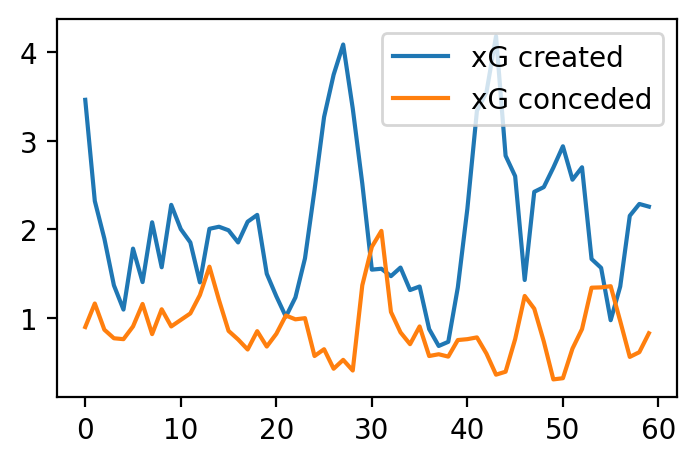

In [57]:
# Plot the data
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

ax.legend()

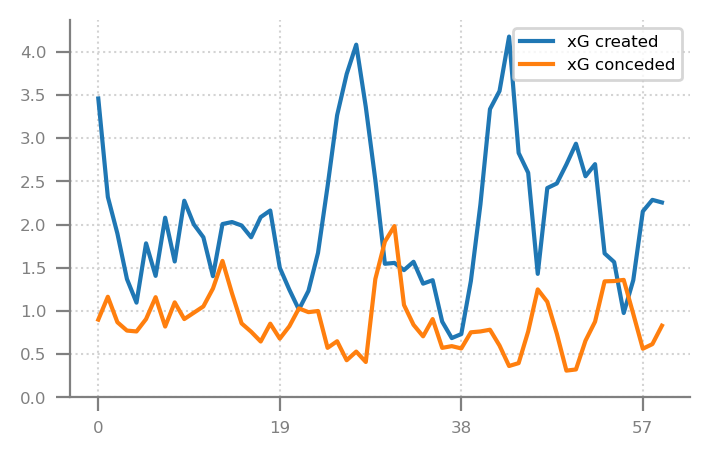

In [84]:
# Plot the data
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

ax.set_facecolor('white')

ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey",
    zorder = 0
)
ax.set_facecolor('white')


# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")


# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey"
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(0)


ax.legend(fontsize = 6)

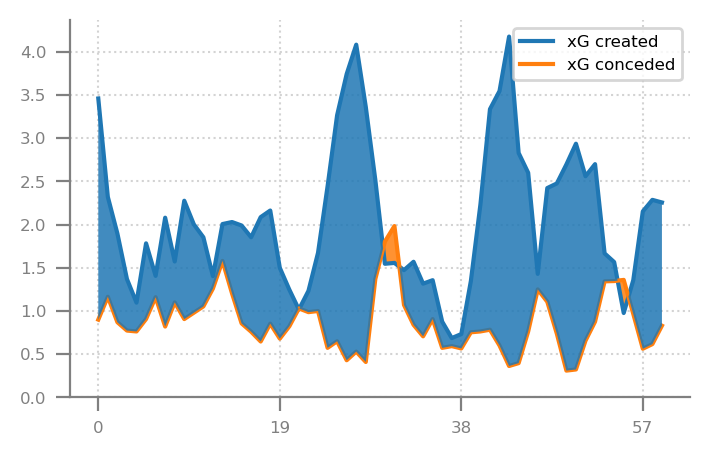

In [85]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

fig.set_facecolor("white")

ax.set_facecolor('white')

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

# Fill between
ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_for > Y_ag, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_ag >= Y_for, 
    interpolate = True,
    alpha = 0.85
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(0)


ax.legend(fontsize = 6)

In [92]:
from PIL import Image
import urllib

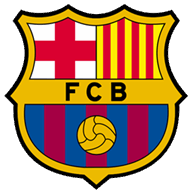

In [100]:
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.01, .95, 0.11, 0.11], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8634.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")
club_icon

Text(0.95, 0.05, 'Enzo Villafuerte')

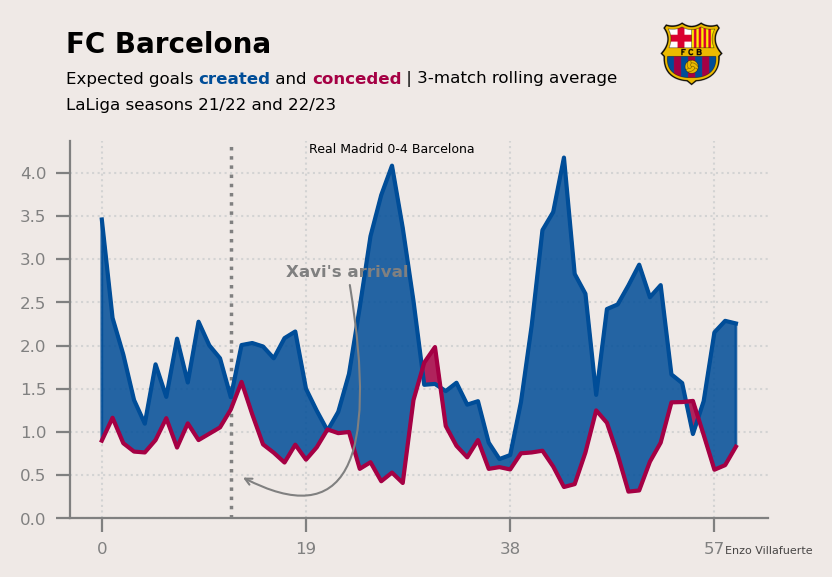

In [166]:
fig = plt.figure(figsize=(4.5, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, color = "#004D98", zorder = 4)
line_2 = ax.plot(X, Y_ag, color = "#A50044", zorder = 4)

ax.set_ylim(0)
# Add a line to mark the division between seasons
ax.plot(
    [12,12], # 12th game into the season was Xavi's first game
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# Annotation with data coordinates and offset points.
ax.annotate(
    xy = (12, .55),
    xytext = (20, 70),
    textcoords = "offset points",
    text = "Xavi's arrival",
    fontweight="bold",
    zorder = 5,
    size = 6,
    color = "grey",
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=100,angleB=-30"
    ) # Arrow to connect annotation
)


# Add referencing text to el clasico
# Add text to the plot

ax.annotate("Real Madrid 0-4 Barcelona", xy=(27, 0), xytext=(27, 4.2), color='black',
            fontsize=4.5, ha='center', va='bottom', 
            #bbox=dict(facecolor='none', edgecolor='grey', boxstyle='round'),
            verticalalignment='top')



# Fill between
ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_for >= Y_ag, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_ag > Y_for, 
    interpolate = True,
    alpha = 0.85,
    color = line_2[0].get_color()
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "FC Barcelona",
    color = "black",
    weight = "bold",
    size = 10,
    family = "DM Sans", #This is a custom font !!
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 3-match rolling average\nLaLiga seasons 21/22 and 22/23",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.75, .99, 0.13, 0.13], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8634.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

fig.text(0.95, 0.05, 'Enzo Villafuerte', fontsize=4, color='black', ha='right', va='bottom', alpha=0.7)